In [3]:
import plot_utils as ut
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from statannot import add_stat_annotation


In [ ]:
gtf_protein_df = ut.coding_gtf_df_load("/home/omuto/SCVELO/gencode.v42.annotation.gtf.gz")

In [6]:
k1_mean_df_E2 =  ut.load_inferred_dynamics_df("/mnt/d/RVINN/E2_MCF7/Merged-Results/k1_mean_df.csv")
k1_mean_df_TAM =  ut.load_inferred_dynamics_df("/mnt/d/RVINN/TAM_MCF7/Merged-Results/k1_mean_df.csv")

Sp_mean_df_E2 =  ut.load_inferred_dynamics_df("/mnt/d/RVINN/E2_MCF7/Merged-Results/Sp_mean_df.csv")  
Sp_mean_df_TAM =  ut.load_inferred_dynamics_df("/mnt/d/RVINN/TAM_MCF7/Merged-Results/Sp_mean_df.csv")


In [7]:
proteins_list = gtf_protein_df["gene_name"].unique().tolist()
proteins_list_E2 = list(set(proteins_list) & set(k1_mean_df_E2.columns.tolist()))
proteins_list_TAM = list(set(proteins_list) & set(k1_mean_df_TAM.columns.tolist()))
intersected_proteins = list(set(proteins_list_E2) & set(proteins_list_TAM))

In [8]:
k1_mean_df_E2 = k1_mean_df_E2[intersected_proteins]
k1_mean_df_TAM = k1_mean_df_TAM[intersected_proteins]

Sp_mean_df_E2 = Sp_mean_df_E2[intersected_proteins]
Sp_mean_df_TAM = Sp_mean_df_TAM[intersected_proteins]

log2FC_k1_mean_df_E2 = ut.log2FC_transform(k1_mean_df_E2)
log2FC_k1_mean_df_TAM = ut.log2FC_transform(k1_mean_df_TAM)

In [ ]:
filtered_id_df = ut.load_FANTOM5_filtered_id_df(sample_name2library_id_path="/mnt/d/PINN/FANTOM5/Enhancer/GRCh38/Human.sample_name2library_id.txt", search_sample_name="MCF7")
enhancer_df = ut.load_FANTOM5_enhancer_df("/mnt/d/PINN/FANTOM5/Enhancer/GRCh38/F5.hg38.enhancers.expression.tpm.matrix/F5.hg38.enhancers.expression.tpm.matrix")
filtered_enhancer_df = ut.filter_FANTOM5_enhancer_df(filtered_id_df=filtered_id_df, enhancer_df=enhancer_df)
cis_df = filtered_enhancer_df[np.log1p(filtered_enhancer_df["sum"]) > 4]

In [13]:
human_hallmark = pd.read_csv("/mnt/d/BoGs/MsigDB/human_hallmark_gene_sets.csv", sep=",")
human_hallmark = human_hallmark[["gs_name", "gene_symbol"]].reset_index(drop=True)
human_hallmark_list = human_hallmark["gs_name"].unique().tolist()

human_hallmark_dict = {}
for hallmark in human_hallmark_list:
    human_hallmark_dict[hallmark] = human_hallmark[human_hallmark["gs_name"] == hallmark]["gene_symbol"].tolist()
hvg_list = human_hallmark_dict["HALLMARK_ESTROGEN_RESPONSE_EARLY"]

In [ ]:
pair_wise_corr_df_E2_average, pair_wise_corr_df_E2_random_average = ut.within_and_outside_average_correlation_df(out_df=k1_mean_df_E2, 
                                                                                                                 gtf_df=gtf_protein_df, 
                                                                                                                 cis_df=cis_df, 
                                                                                                                 distance_kb=300, 
                                                                                                                 enhancer_distance_kb=20, 
                                                                                                                 hvg_list=hvg_list)
pair_wise_corr_df_tam_average, pair_wise_corr_df_tam_random_average = ut.within_and_outside_average_correlation_df(out_df=k1_mean_df_TAM, 
                                                                                                                   gtf_df=gtf_protein_df, 
                                                                                                                   cis_df=cis_df, 
                                                                                                                   distance_kb=300, 
                                                                                                                   enhancer_distance_kb=20, 
                                                                                                                   hvg_list=hvg_list)

In [ ]:
pair_wise_corr_df_E2_average["group"] = "E2"
pair_wise_corr_df_E2_random_average["group"] = "random"
pair_wise_corr_df_tam_average["group"] = "TAM"

all_pair_wise_corr_df_E2_tam_average = pd.concat([pair_wise_corr_df_E2_average, pair_wise_corr_df_tam_average], ignore_index=True)

all_pair_wise_corr_df_E2_tam_random_average = pd.concat([all_pair_wise_corr_df_E2_tam_average, pair_wise_corr_df_E2_random_average], ignore_index=True)

In [19]:
box_pairs_E2_TAM = [
    (("< 50kb", "E2"), ("< 50kb", "TAM")),
    (("50-100kb", "E2"), ("50-100kb", "TAM")),
    (("100-150kb", "E2"), ("100-150kb", "TAM")),
    (("150-200kb", "E2"), ("150-200kb", "TAM")),
    (("200-250kb", "E2"), ("200-250kb", "TAM")),
    (("250-300kb", "E2"), ("250-300kb", "TAM")),
    ]
box_pairs_E2_random = [
    (("< 50kb", "E2"), ("random", "random")),
    (("50-100kb", "E2"), ("random", "random")),
    (("100-150kb", "E2"), ("random", "random")),
    (("150-200kb", "E2"), ("random", "random")),
    (("200-250kb", "E2"), ("random", "random")),
    (("250-300kb", "E2"), ("random", "random")),
    ]

order_x = ["< 50kb", 
           "50-100kb", 
           "100-150kb", 
           "150-200kb",
           "200-250kb",
           "250-300kb",
           "random"]

null hypothesis: Central Tendency of Group1 is greater than Group2
Group1:< 50kb_&_E2, Group2:< 50kb_&_TAM
Group1:50-100kb_&_E2, Group2:50-100kb_&_TAM
Group1:100-150kb_&_E2, Group2:100-150kb_&_TAM
Group1:150-200kb_&_E2, Group2:150-200kb_&_TAM
Group1:200-250kb_&_E2, Group2:200-250kb_&_TAM
Group1:250-300kb_&_E2, Group2:250-300kb_&_TAM
null hypothesis: Central Tendency of Group1 is greater than Group2
Group1:< 50kb_&_E2, Group2:random_&_random
Group1:50-100kb_&_E2, Group2:random_&_random
Group1:100-150kb_&_E2, Group2:random_&_random
Group1:150-200kb_&_E2, Group2:random_&_random
Group1:200-250kb_&_E2, Group2:random_&_random
Group1:250-300kb_&_E2, Group2:random_&_random
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

50-100kb_E2 v.s. 50-100kb_TAM: Custom statistical test, P_val:5.321e-14
100-150kb_E2 v.s. 100-150kb_TAM: Custom statistical test, P_val:7.984e-17
150-200kb_E2 v.s

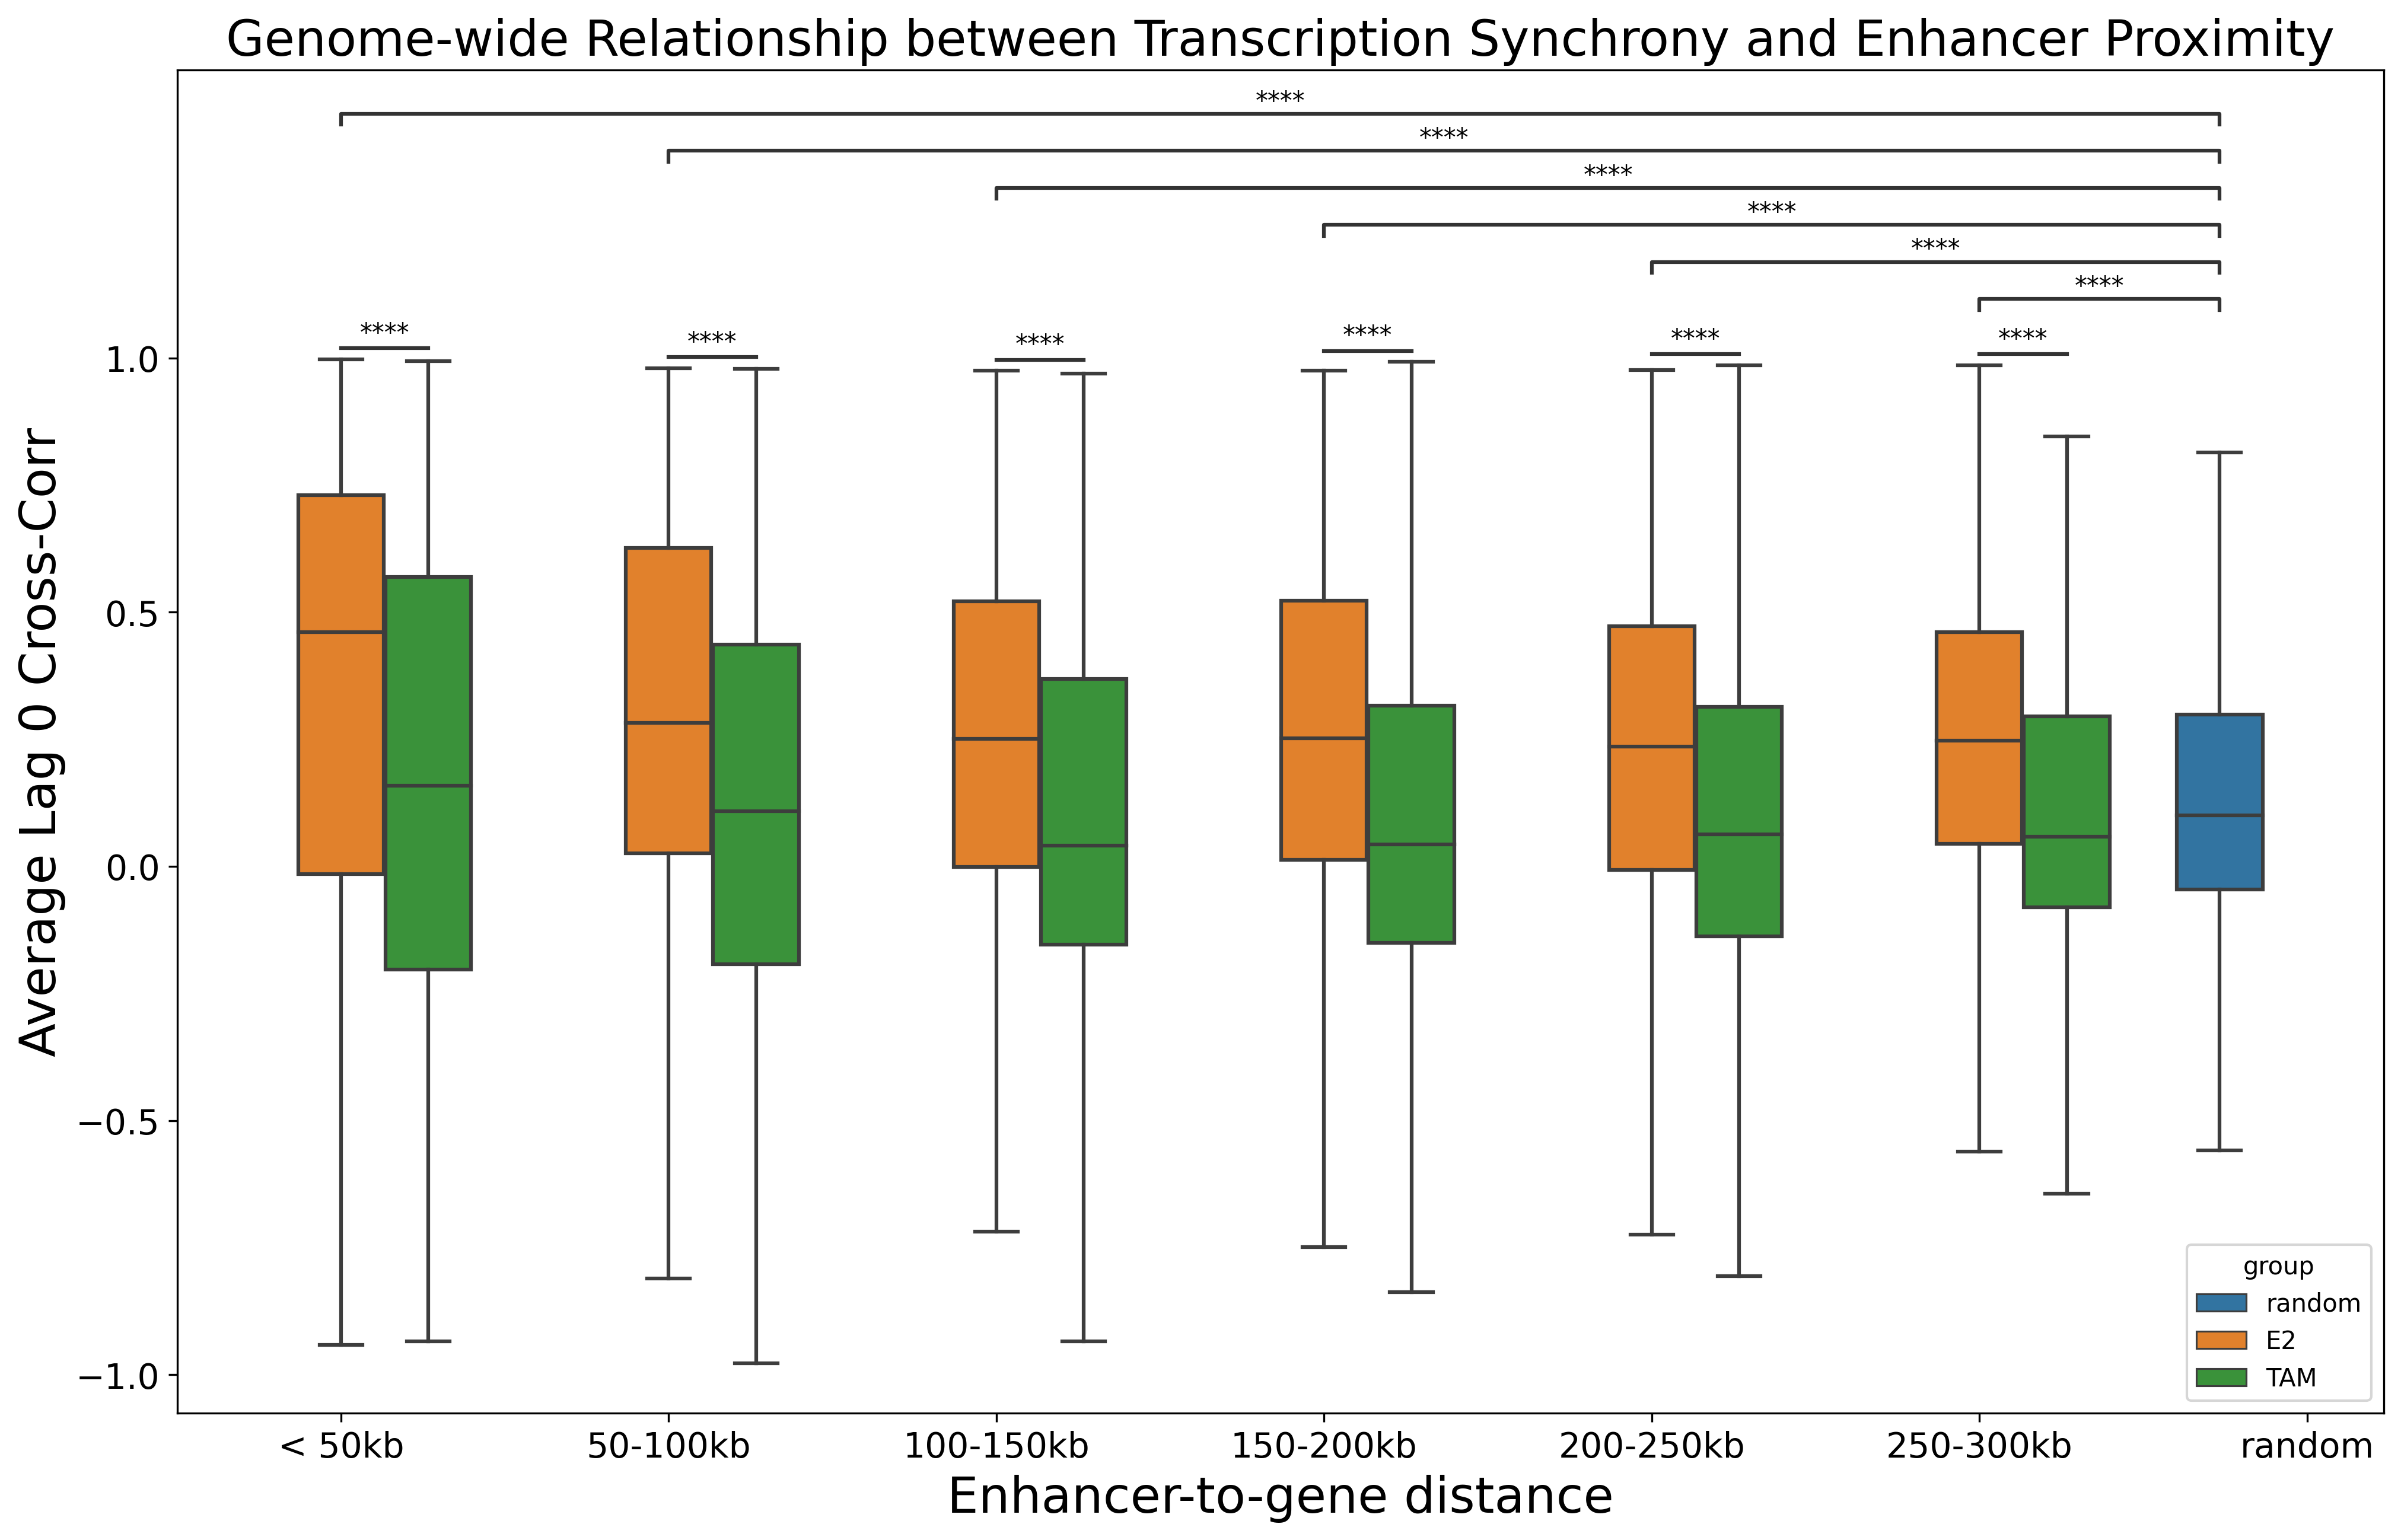

In [20]:
data_df = all_pair_wise_corr_df_E2_tam_random_average

hue_order = ["random", "E2", "TAM"]


plt.figure(figsize=(16, 10), dpi=300)
ax = sns.boxplot(
    data=data_df,
    x="genomic_distance",
    y="average_correlation",
    order=order_x,
    hue_order=hue_order,
    sym="",
    hue="group"
)
ax.set_xlabel("Enhancer-to-gene distance", fontsize=20)
ax.set_ylabel("Average Lag 0 Cross-Corr", fontsize=20)
ax.set_yticks([-1, -0.5, 0, 0.5, 1])
# test parameters
alpha = 0.05
correction_method = "fdr_bh"
alternative = "greater"
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)

# mannwhitneyu test
results_E2_TAM = ut.adjusted_Mann_Whitney(data_df, box_pairs_E2_TAM, "genomic_distance", "average_correlation", "group", alpha=alpha, correction_method=correction_method, alternative=alternative)
results_E2_random = ut.adjusted_Mann_Whitney(data_df, box_pairs_E2_random, "genomic_distance", "average_correlation", "group", alpha=alpha, correction_method=correction_method, alternative=alternative)

add_stat_annotation(
    ax,
    data=data_df,
    x="genomic_distance",
    y="average_correlation",
    hue="group",
    order=order_x,
    hue_order=hue_order,
    box_pairs=results_E2_TAM["pairs"],  
    perform_stat_test=False,
    pvalues=results_E2_TAM["adjusted_pvalues"],
    text_format="star",  #'star' or 'full'
    loc="inside",  # 'inside' or 'outside'
    line_height=0.000,
    line_offset_to_box=0.01, 
    verbose=1
)

# results mannwhitneyu test
print("All pairs:", results_E2_TAM["pairs"])
print("P-values:", results_E2_TAM["pvalues"])
print("Adjusted P-values:", results_E2_TAM["adjusted_pvalues"])
print("Significant pairs:", results_E2_TAM["significant_pairs"])

add_stat_annotation(
    ax,
    data=data_df,
    x="genomic_distance",
    y="average_correlation",
    hue="group",
    order=order_x,
    hue_order=hue_order,
    box_pairs=results_E2_random["pairs"],  
    perform_stat_test=False,
    pvalues=results_E2_random["adjusted_pvalues"],
    text_format="star",  #'star' or 'full'
    loc="inside",  # 'inside' or 'outside'
    line_height=0.01,
    line_offset_to_box=0.05,
    line_offset=0.005,
    text_offset=0.001, 
    verbose=1
)
plt.title("Genome-wide Relationship between Transcription Synchrony and Enhancer Proximity", fontsize=20)
# results mannwhitneyu test
print("All pairs:", results_E2_random["pairs"])
print("P-values:", results_E2_random["pvalues"])
print("Adjusted P-values:", results_E2_random["adjusted_pvalues"])
print("Significant pairs:", results_E2_random["significant_pairs"])

In [ ]:
chromosome = "chr1"
cis_k1_df_E2, cis_k1_dict_E2 = ut.gene2loci_df(gtf_protein_df, k1_mean_df_E2, chromosome)
cis_k1_df_TAM, cis_k1_dict_TAM = ut.gene2loci_df(gtf_protein_df, k1_mean_df_TAM, chromosome)

cis_Sp_df_E2, cis_Sp_dict_E2 = ut.gene2loci_df(gtf_protein_df, Sp_mean_df_E2, chromosome)
cis_Sp_df_TAM, cis_Sp_dict_TAM = ut.gene2loci_df(gtf_protein_df, Sp_mean_df_TAM, chromosome)


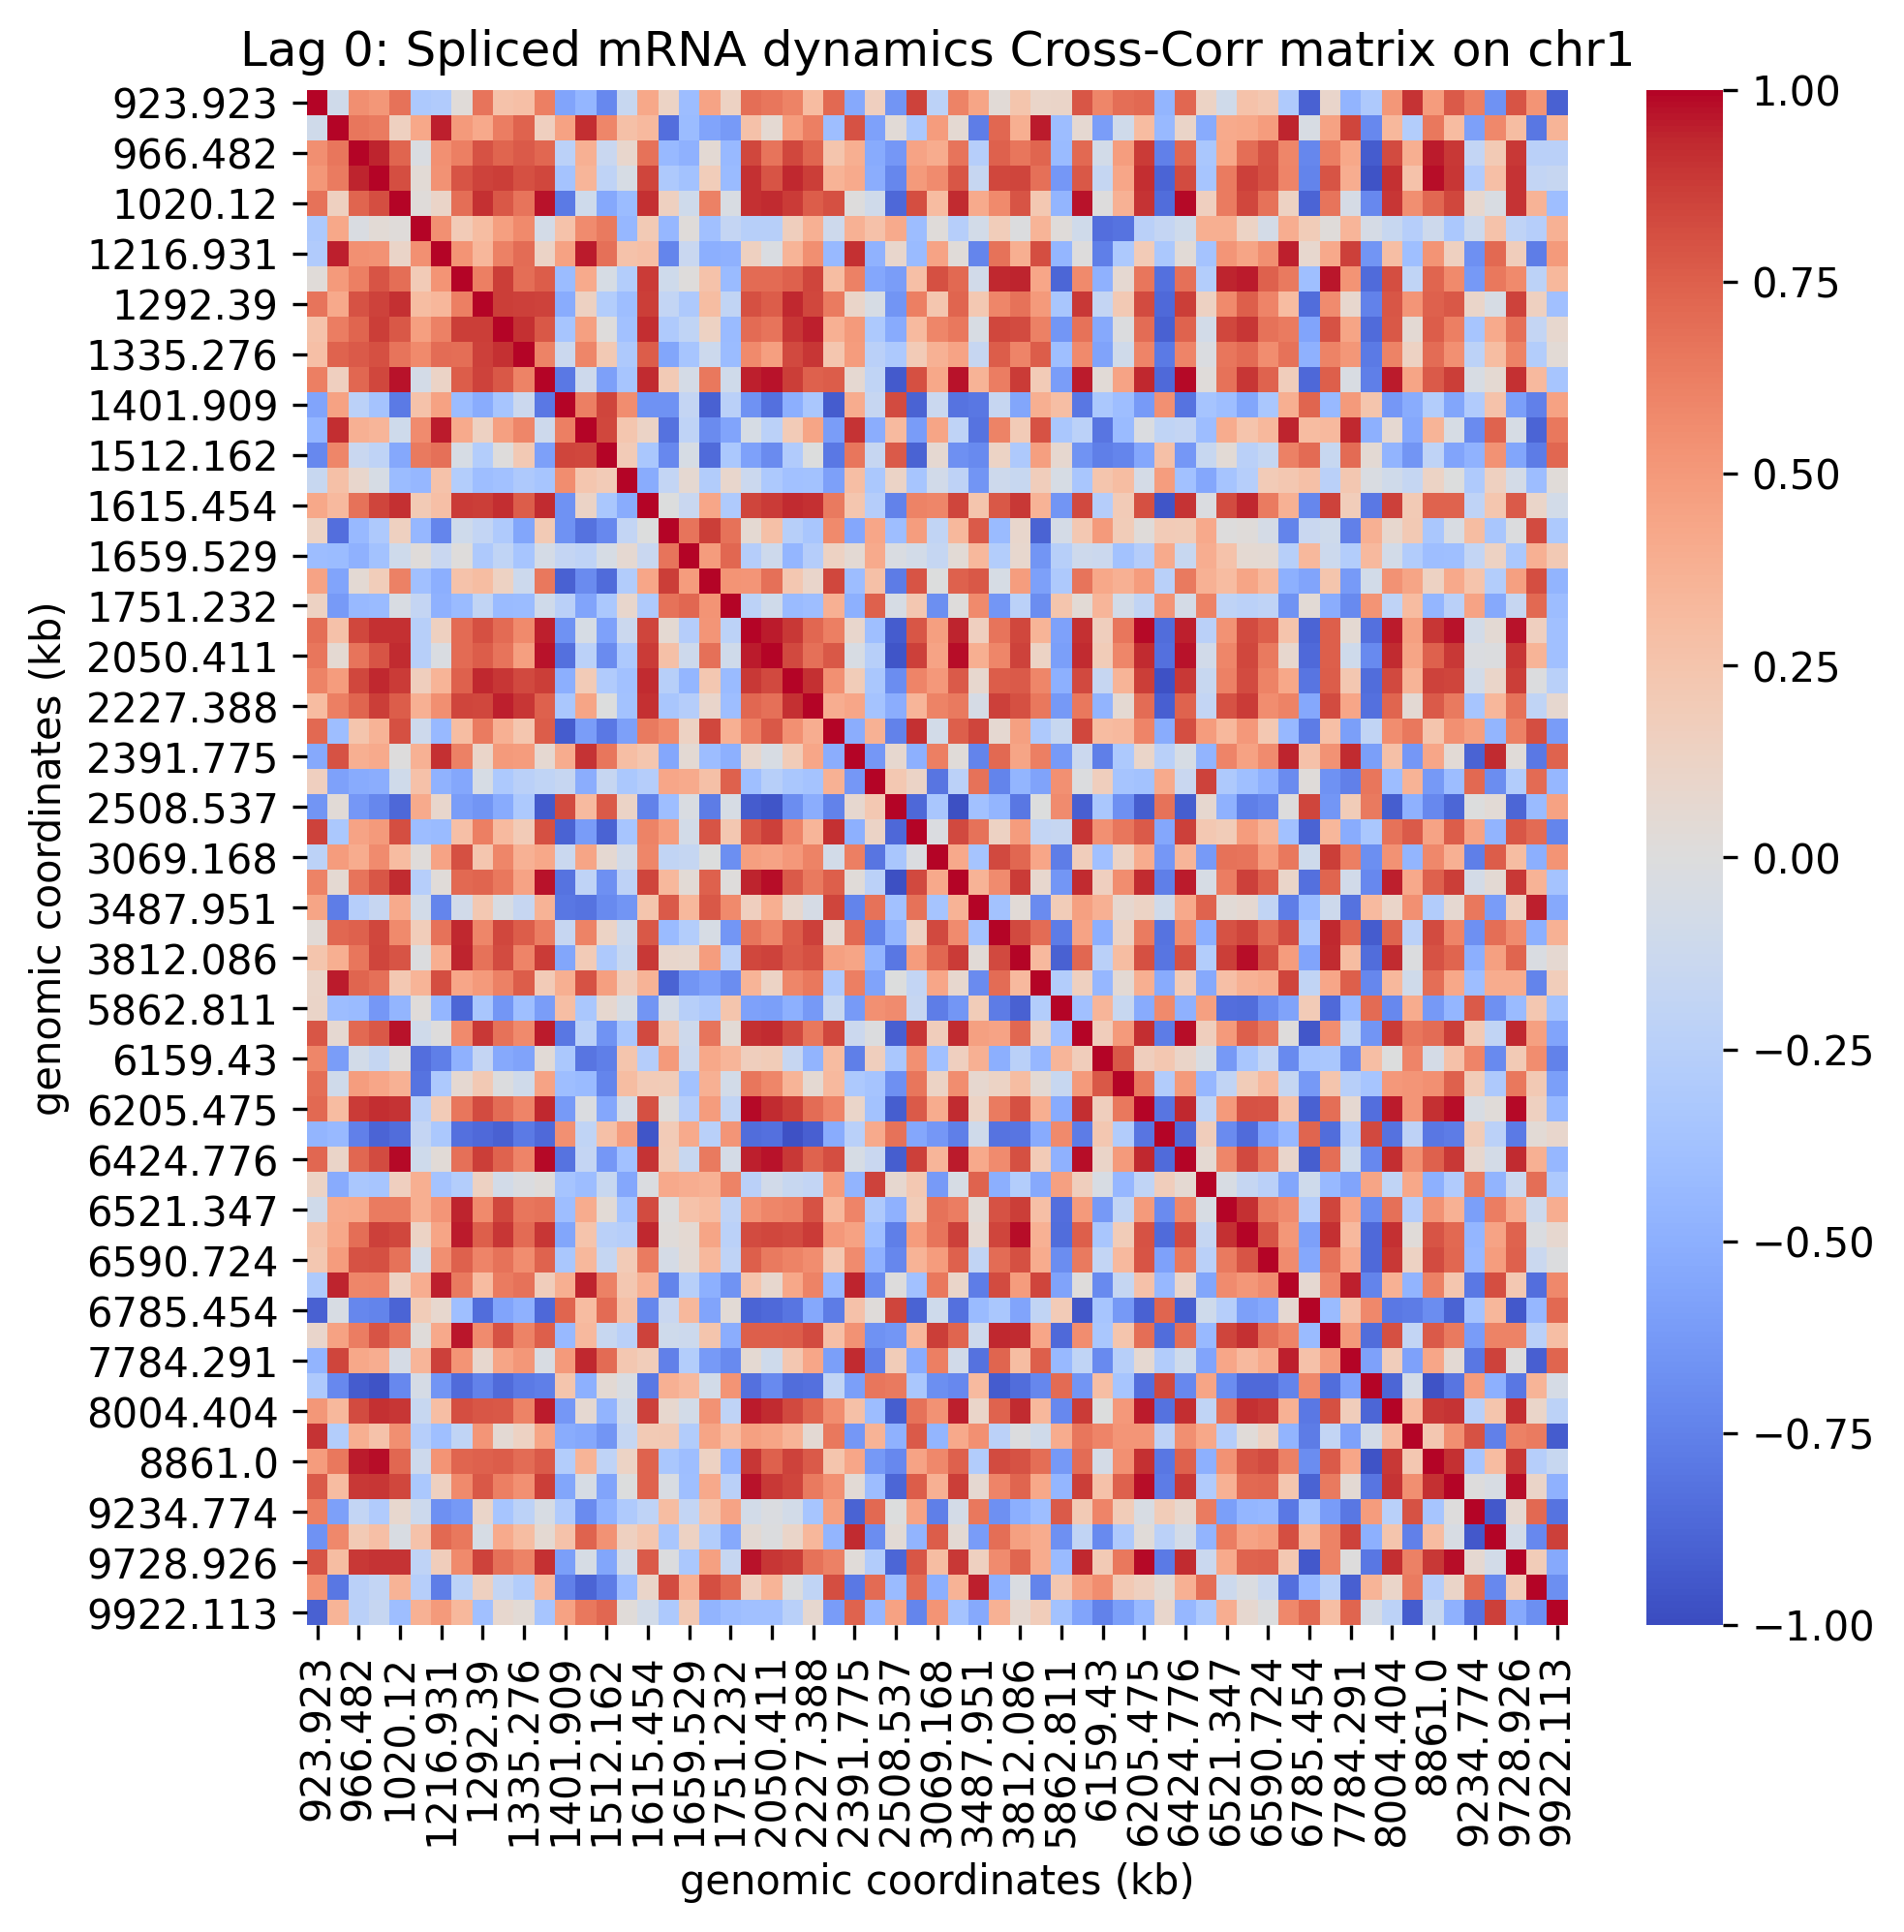

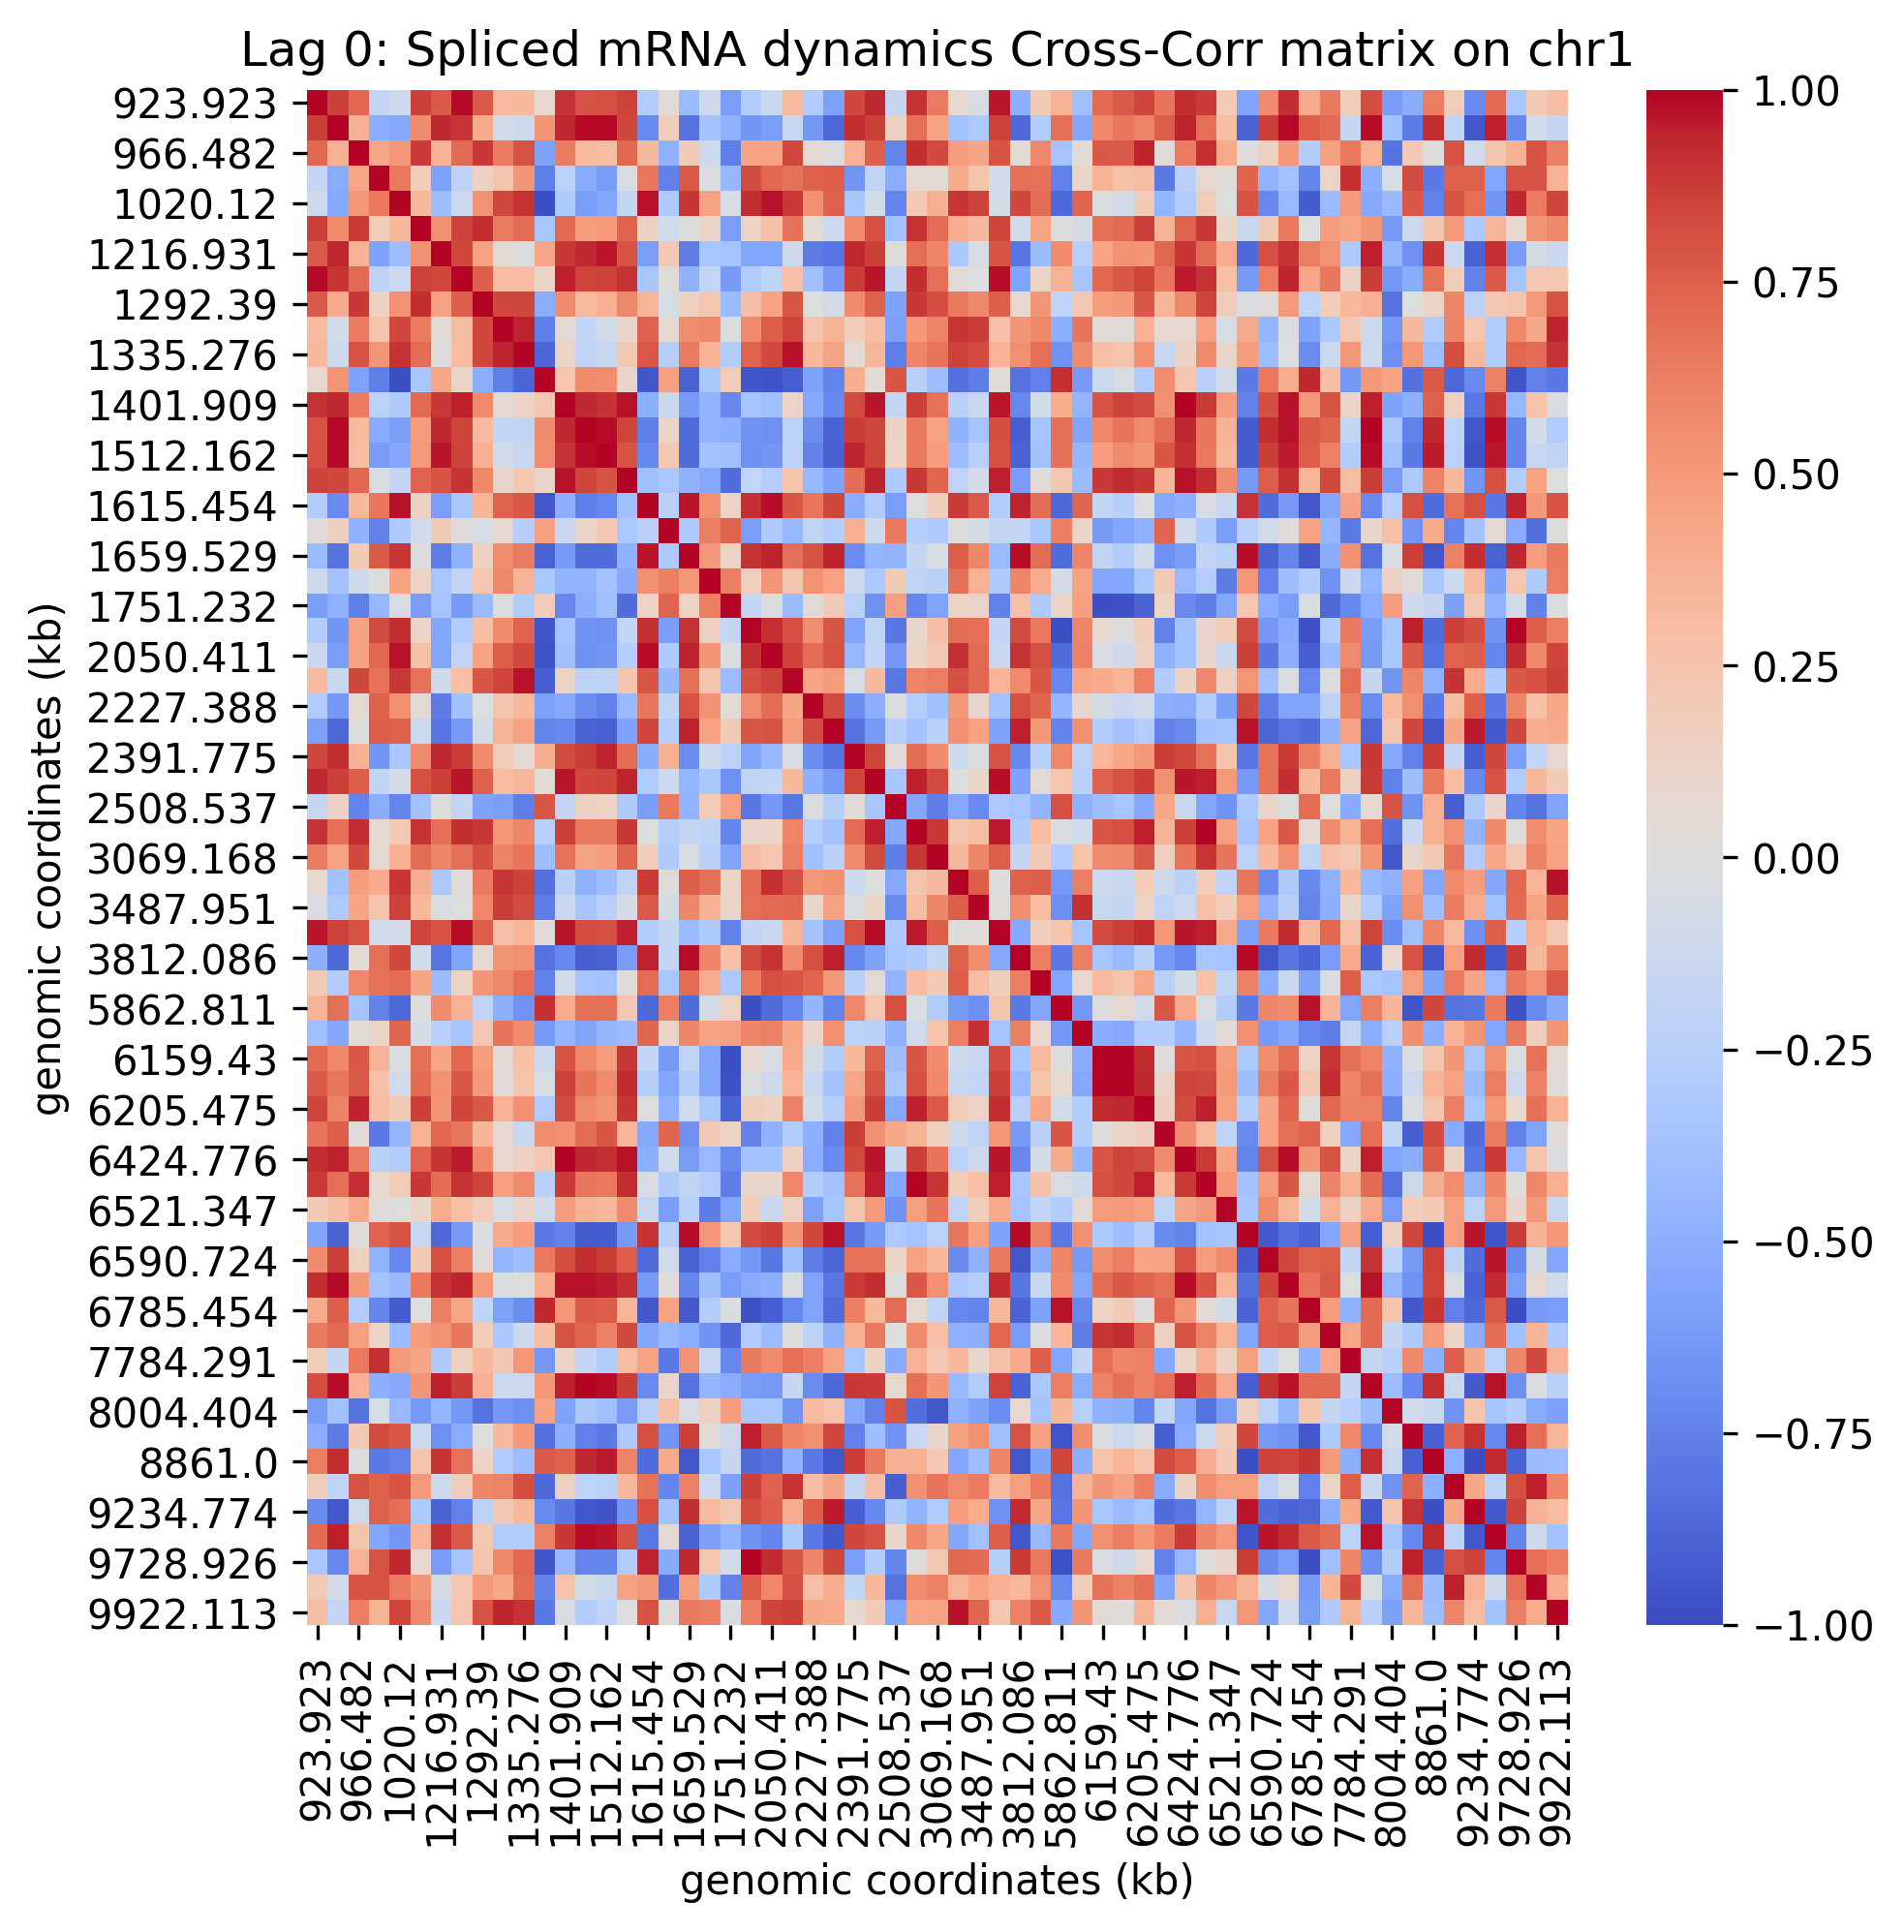

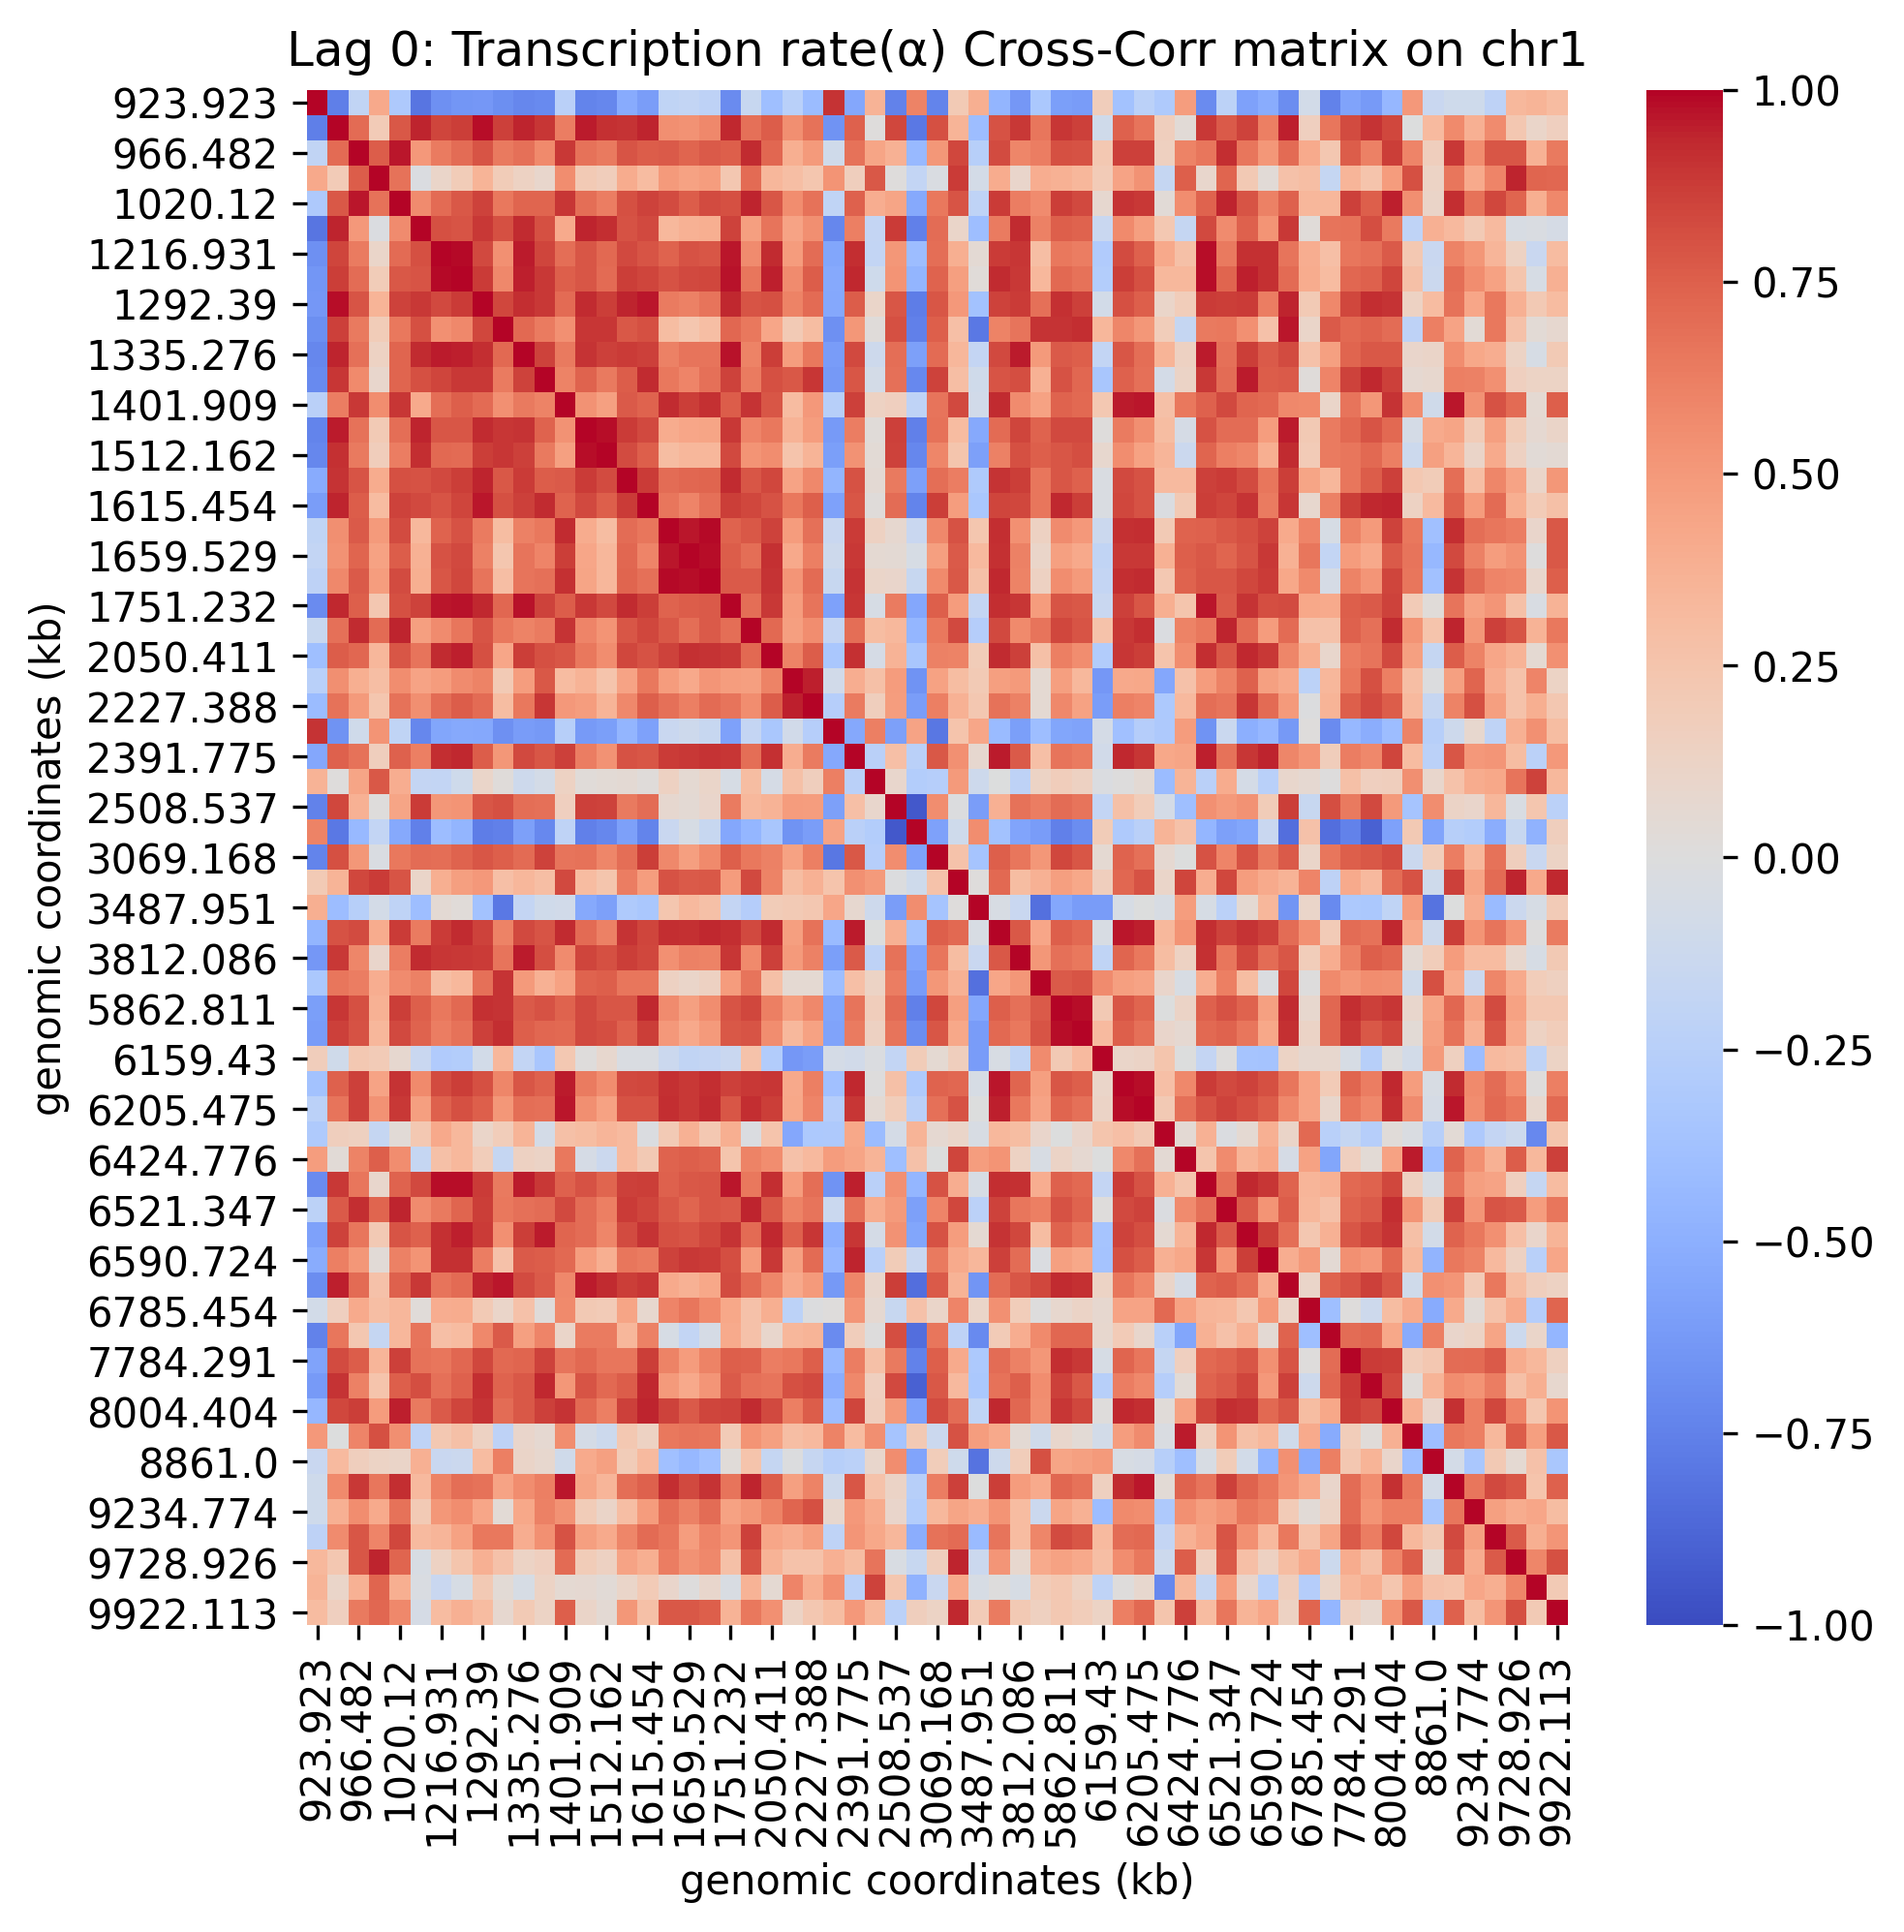

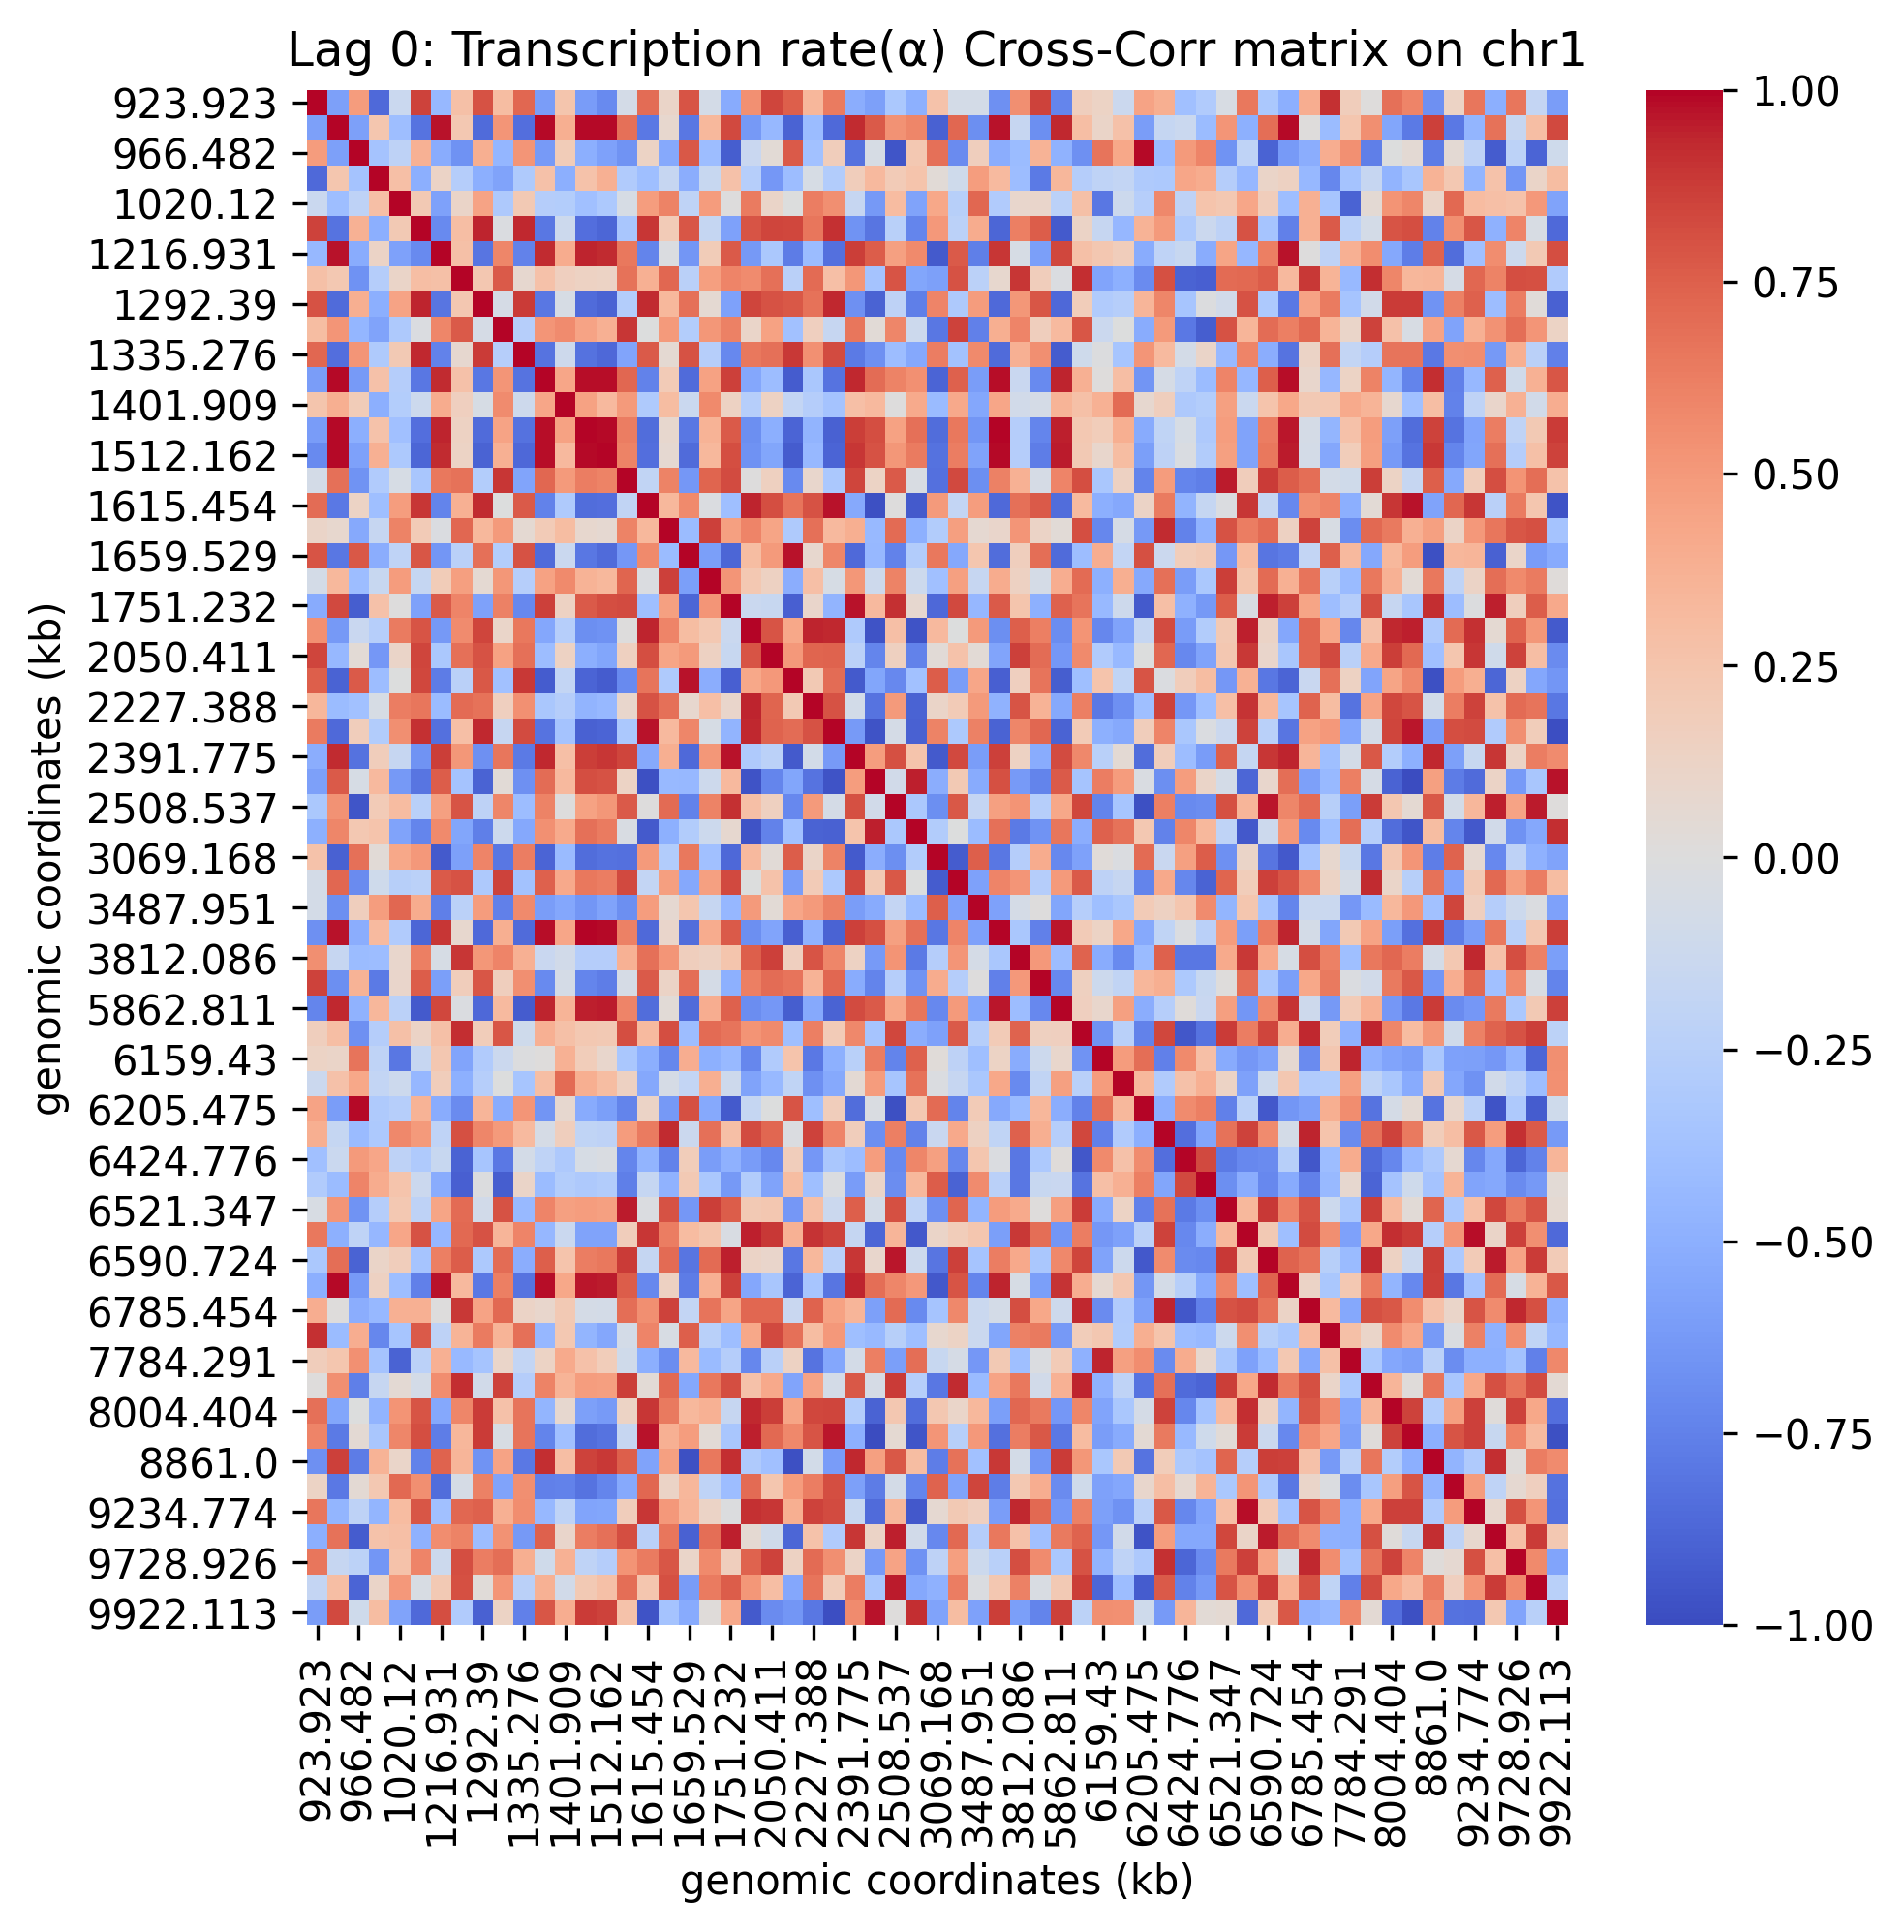

In [ ]:
chromosome = "chr1"
cis_k1_df_E2, cis_k1_dict_E2 = ut.gene2loci_df(gtf_protein_df, k1_mean_df_E2, chromosome)
cis_k1_df_TAM, cis_k1_dict_TAM = ut.gene2loci_df(gtf_protein_df, k1_mean_df_TAM, chromosome)

cis_Sp_df_E2, cis_Sp_dict_E2 = ut.gene2loci_df(gtf_protein_df, Sp_mean_df_E2, chromosome)
cis_Sp_df_TAM, cis_Sp_dict_TAM = ut.gene2loci_df(gtf_protein_df, Sp_mean_df_TAM, chromosome)
ut.lag_zero_plot_corr_heatmap(cis_Sp_df_E2, "Sp", chromosome, 0, 10000)
ut.lag_zero_plot_corr_heatmap(cis_Sp_df_TAM, "Sp", chromosome, 0, 10000)
ut.lag_zero_plot_corr_heatmap(cis_k1_df_E2, "k1", chromosome, 0, 10000)
ut.lag_zero_plot_corr_heatmap(cis_k1_df_TAM, "k1", chromosome, 0, 10000)

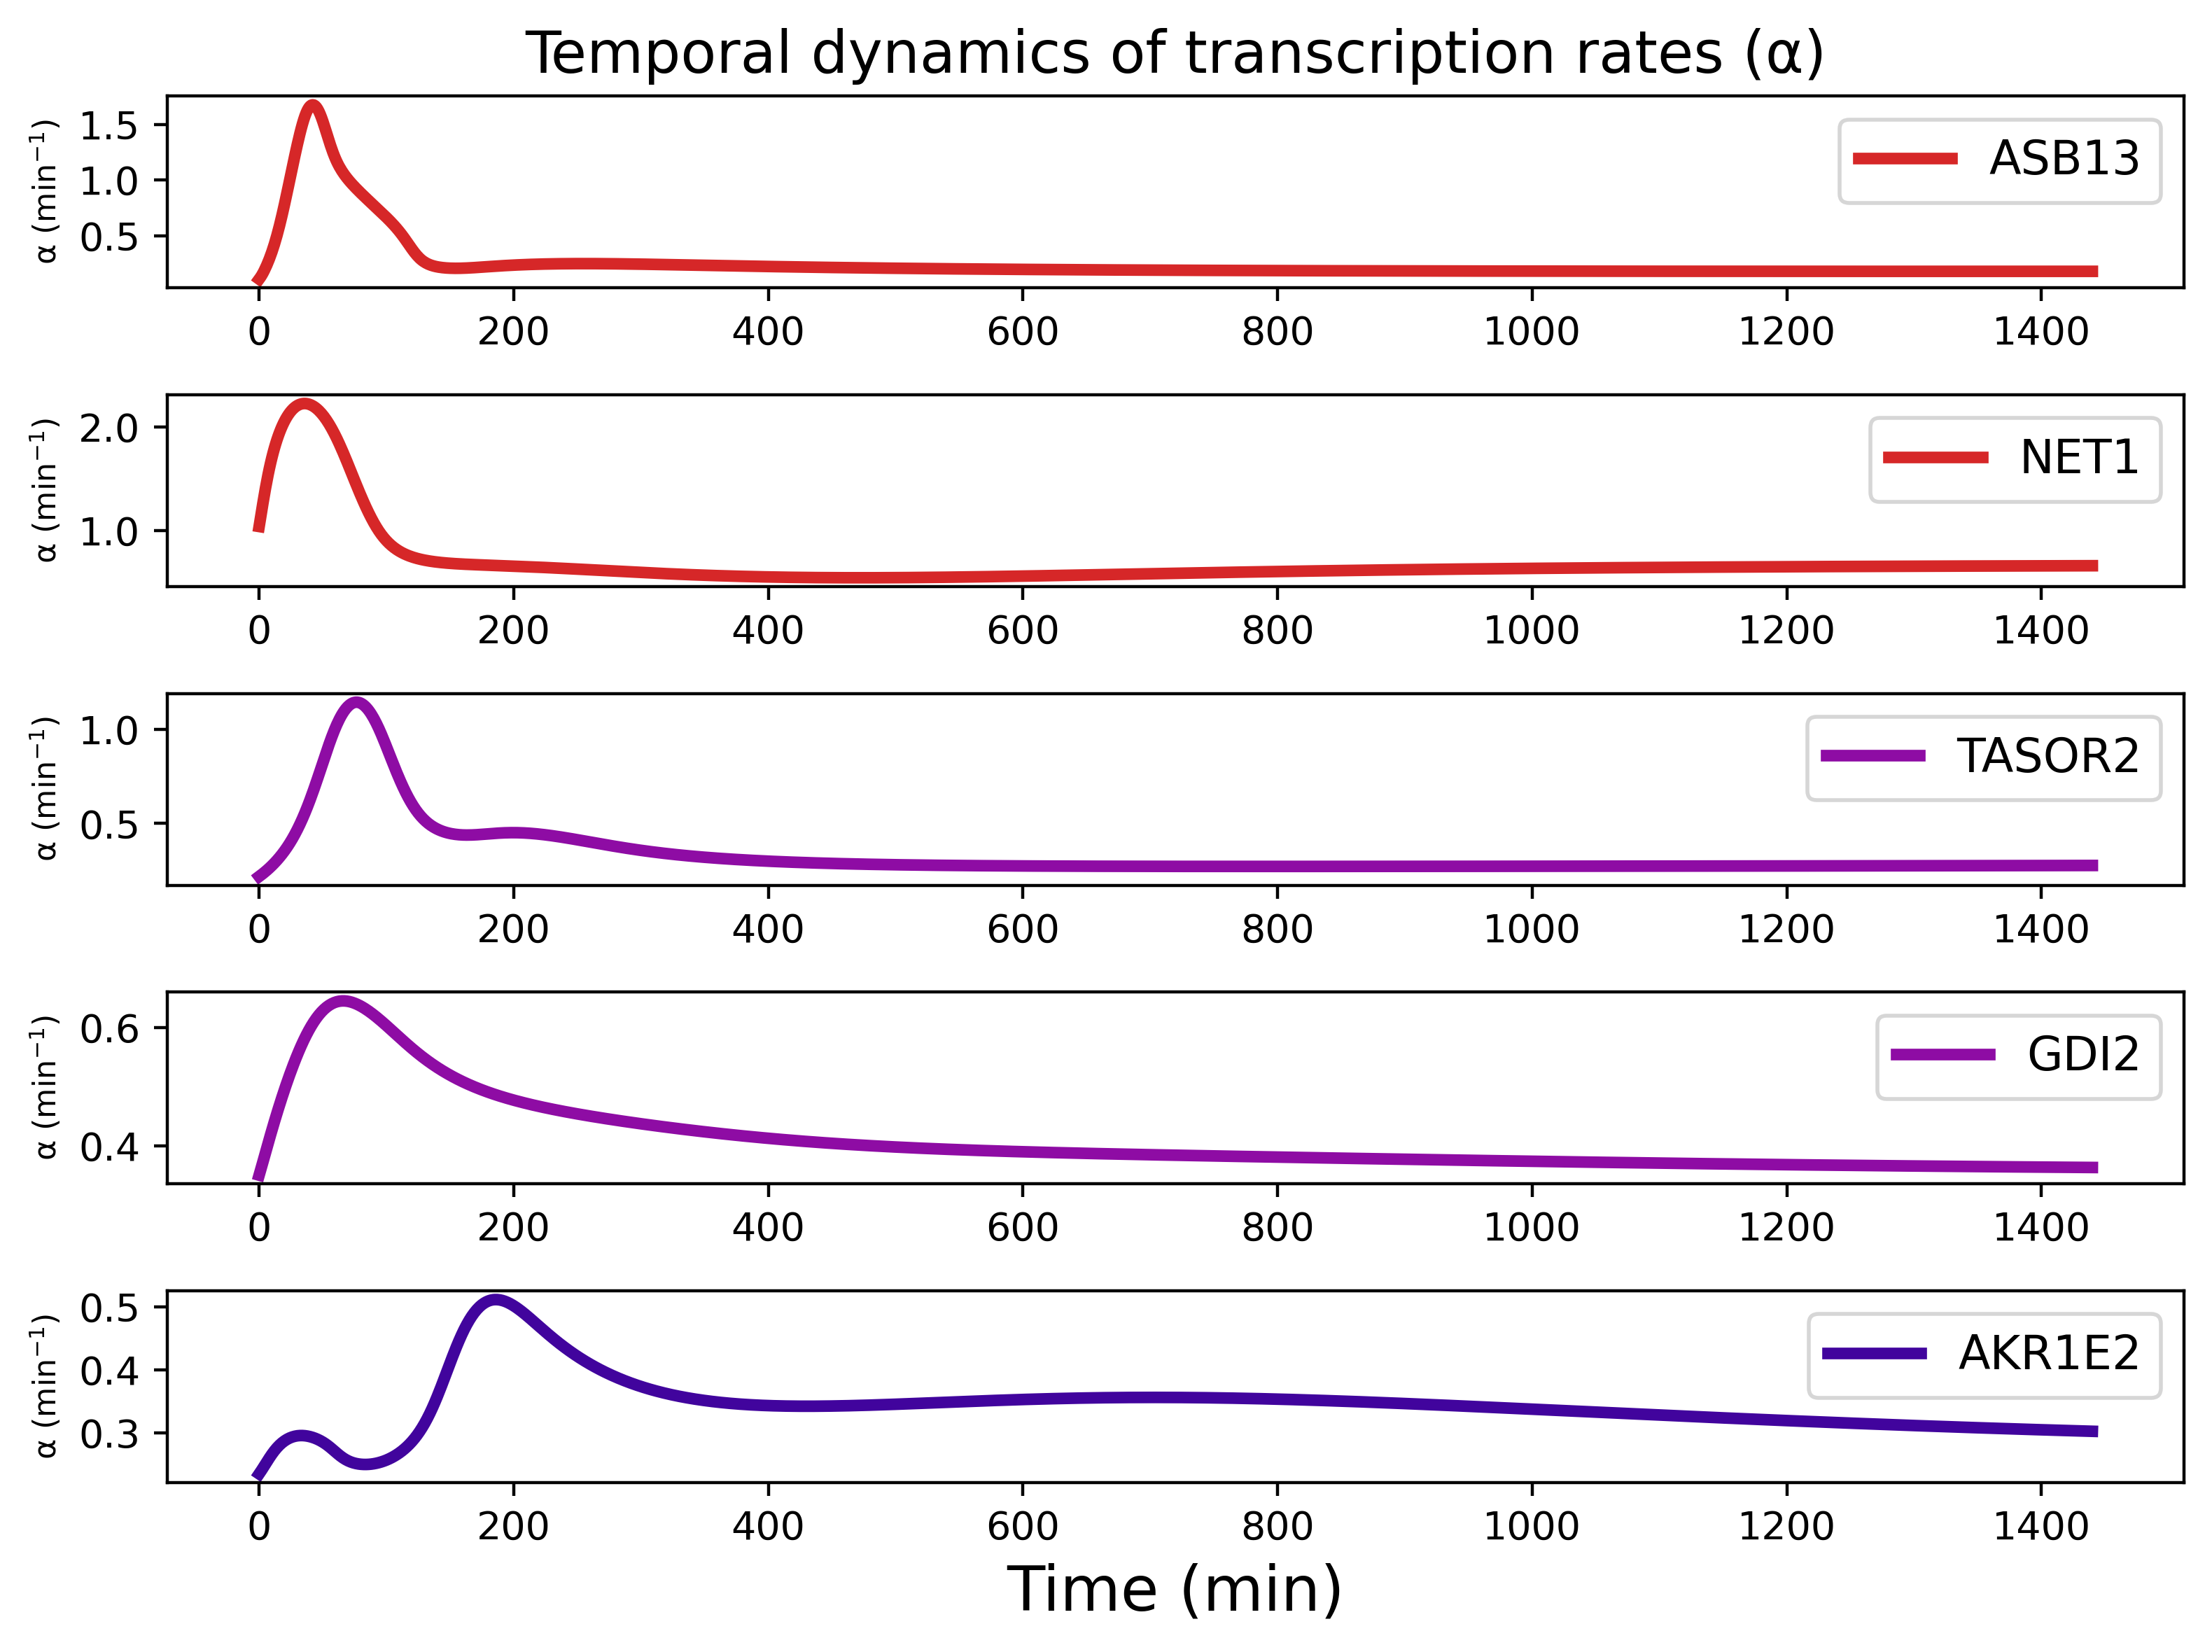

In [24]:
from matplotlib.ticker import FormatStrFormatter
cmap_plasma = plt.get_cmap("plasma")
fig, axes = plt.subplots(5, 1, tight_layout=True, figsize=(8, 6), dpi=400)

axes[0].plot(k1_mean_df_E2["ASB13"], "tab:red", linewidth=3, label="ASB13")
axes[0].set_ylabel("α (min$^{-1}$)", fontsize=8)
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axes[0].legend(fontsize=12)
axes[0].set_title("Temporal dynamics of transcription rates (α)", fontsize=15)

axes[1].plot(k1_mean_df_E2["NET1"], "tab:red", linewidth=3,  label="NET1")
axes[1].set_ylabel("α (min$^{-1}$)", fontsize=8)
axes[1].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axes[1].legend(fontsize=12)

axes[2].plot(k1_mean_df_E2["TASOR2"], color=cmap_plasma(75), linewidth=3, label="TASOR2")
axes[2].set_ylabel("α (min$^{-1}$)", fontsize=8)
axes[2].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axes[2].legend(fontsize=12)

axes[3].plot(k1_mean_df_E2["GDI2"], color=cmap_plasma(75), linewidth=3, label="GDI2")
axes[3].set_ylabel("α (min$^{-1}$)", fontsize=8)
axes[3].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axes[3].legend(fontsize=12)

axes[4].plot(k1_mean_df_E2["AKR1E2"], color=cmap_plasma(25), linewidth=3,  label="AKR1E2")
axes[4].set_ylabel("α (min$^{-1}$)", fontsize=8)
axes[4].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axes[4].legend(fontsize=12)

plt.xlabel("Time (min)", fontsize=16)


plt.show()

In [25]:
ut.compute_ccf_pair_gene(k1_mean_df_E2, k1_mean_df_E2, "NET1", "ASB13").argmax()

/home/omuto/PINN/RVINN_ISMB2025_downstream_analysis/plots_tests/plot_utils.py:822: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  ccf = smt.ccf(x_df[x_gene], y_df[y_gene], unbiased=False)


0

0
0
27
19
140


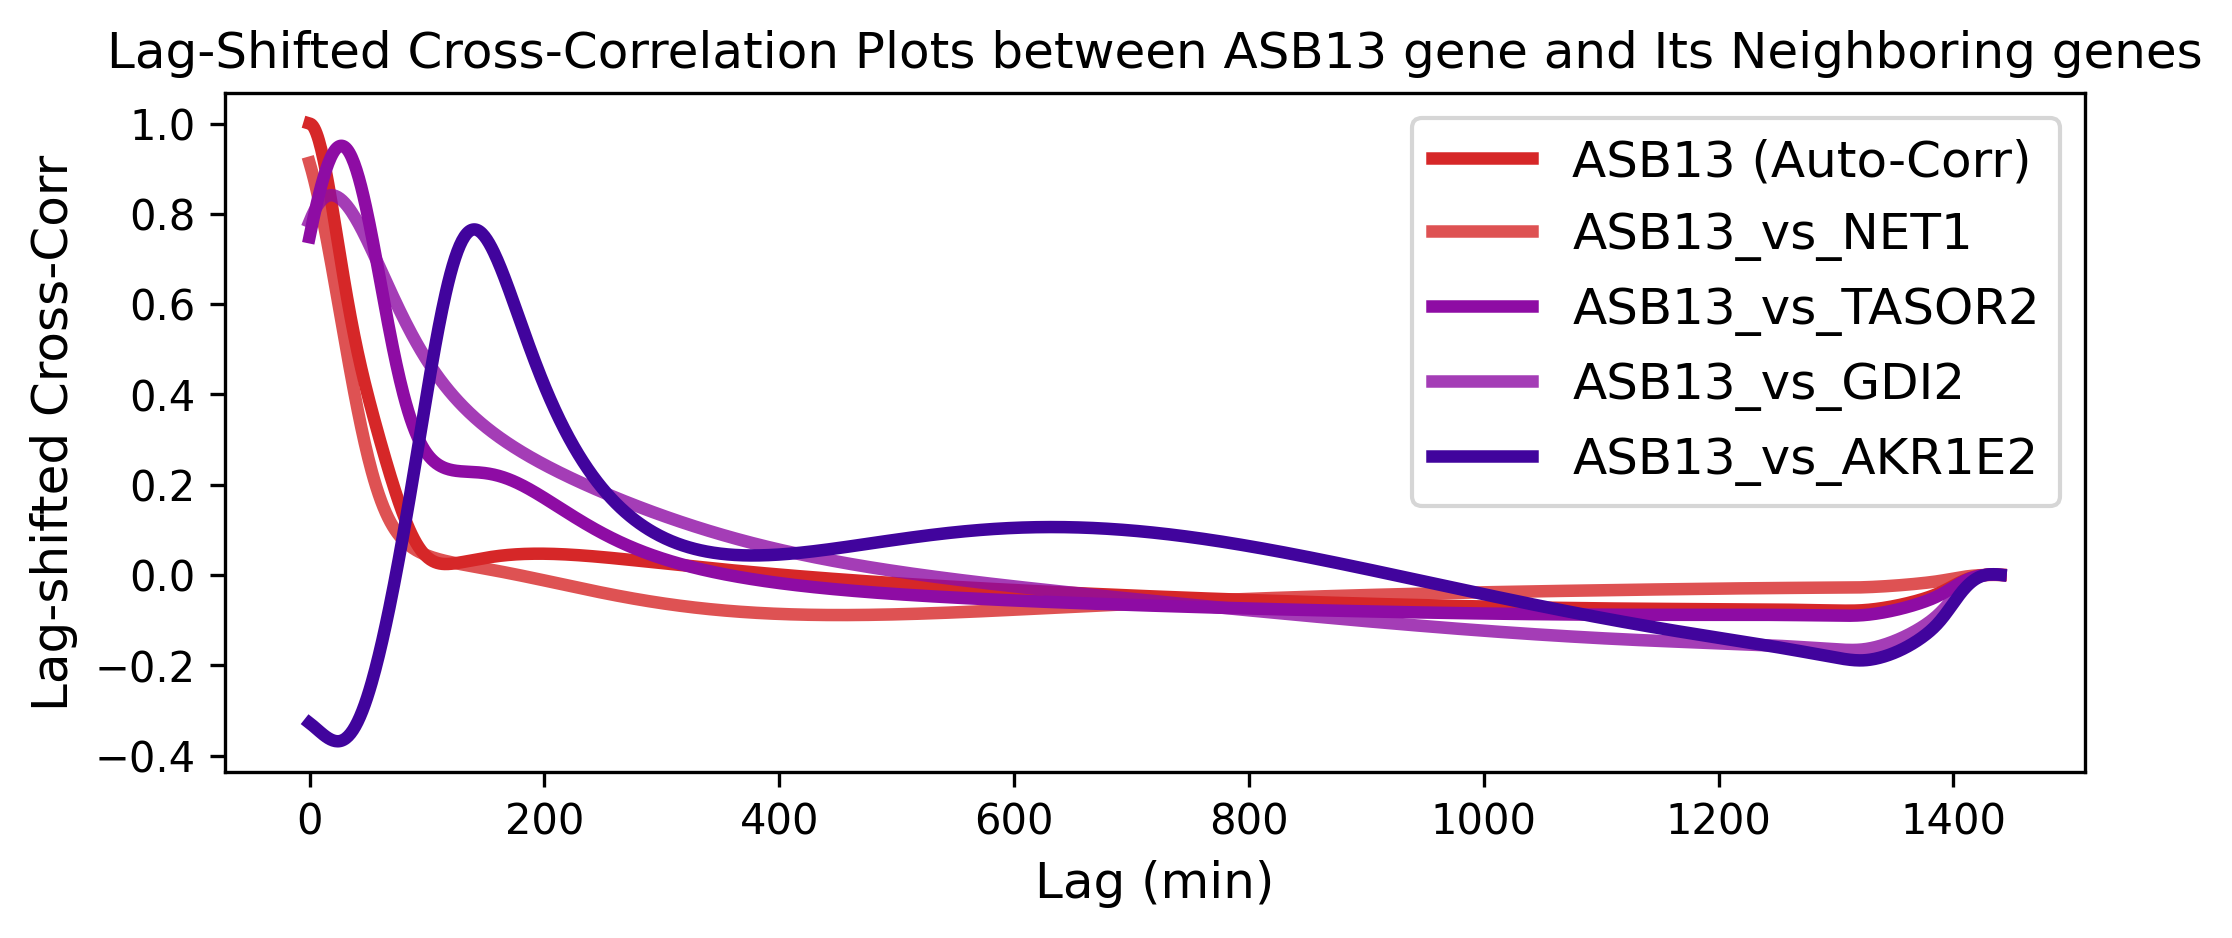

In [26]:
plt.figure(figsize=(8,3), dpi=300)
print(ut.compute_ccf_pair_gene(k1_mean_df_E2, k1_mean_df_E2, "ASB13", "ASB13").argmax())
plt.plot(ut.compute_ccf_pair_gene(k1_mean_df_E2, k1_mean_df_E2, "ASB13", "ASB13"), "tab:red", linewidth=3, alpha=1, label="ASB13 (Auto-Corr)")
print(ut.compute_ccf_pair_gene(k1_mean_df_E2, k1_mean_df_E2, "NET1", "ASB13").argmax())
plt.plot(ut.compute_ccf_pair_gene(k1_mean_df_E2, k1_mean_df_E2, "NET1", "ASB13"), "tab:red", linewidth=3, alpha=0.8, label="ASB13_vs_NET1")
print(ut.compute_ccf_pair_gene(k1_mean_df_E2, k1_mean_df_E2, "TASOR2", "ASB13").argmax())
plt.plot(ut.compute_ccf_pair_gene(k1_mean_df_E2, k1_mean_df_E2, "TASOR2", "ASB13"), color=cmap_plasma(75), linewidth=3, alpha=1, label="ASB13_vs_TASOR2")
print(ut.compute_ccf_pair_gene(k1_mean_df_E2, k1_mean_df_E2, "GDI2", "ASB13").argmax())
plt.plot(ut.compute_ccf_pair_gene(k1_mean_df_E2, k1_mean_df_E2, "GDI2", "ASB13"), color=cmap_plasma(75), linewidth=3, alpha=0.8, label="ASB13_vs_GDI2")
print(ut.compute_ccf_pair_gene(k1_mean_df_E2, k1_mean_df_E2, "AKR1E2", "ASB13").argmax())
plt.plot(ut.compute_ccf_pair_gene(k1_mean_df_E2, k1_mean_df_E2, "AKR1E2", "ASB13"), color=cmap_plasma(25), linewidth=3, alpha=1, label="ASB13_vs_AKR1E2")
plt.ylabel("Lag-shifted Cross-Corr", fontsize=12)
plt.xlabel("Lag (min)", fontsize=12)
plt.title("Lag-Shifted Cross-Correlation Plots between ASB13 gene and Its Neighboring genes", fontsize=12)
plt.legend(fontsize=12)

  seqname  source feature    start      end  score strand       gene_type  \
0   chr10  HAVANA    gene  4786629  4848062    NaN      +  protein_coding   
1   chr10  HAVANA    gene  5412557  5459056    NaN      +  protein_coding   
2   chr10  HAVANA    gene  5638867  5666595    NaN      -  protein_coding   
3   chr10  HAVANA    gene  5684731  5763779    NaN      +  protein_coding   
4   chr10  HAVANA    gene  5765223  5842132    NaN      -  protein_coding   

  gene_name transcript_name transcript_id transcript_type  start_kb    end_kb  \
0    AKR1E2                                                4786.629  4848.062   
1      NET1                                                5412.557  5459.056   
2     ASB13                                                5638.867  5666.595   
3    TASOR2                                                5684.731  5763.779   
4      GDI2                                                5765.223  5842.132   

   gene_length_kb  center_kb  
0          61.433  

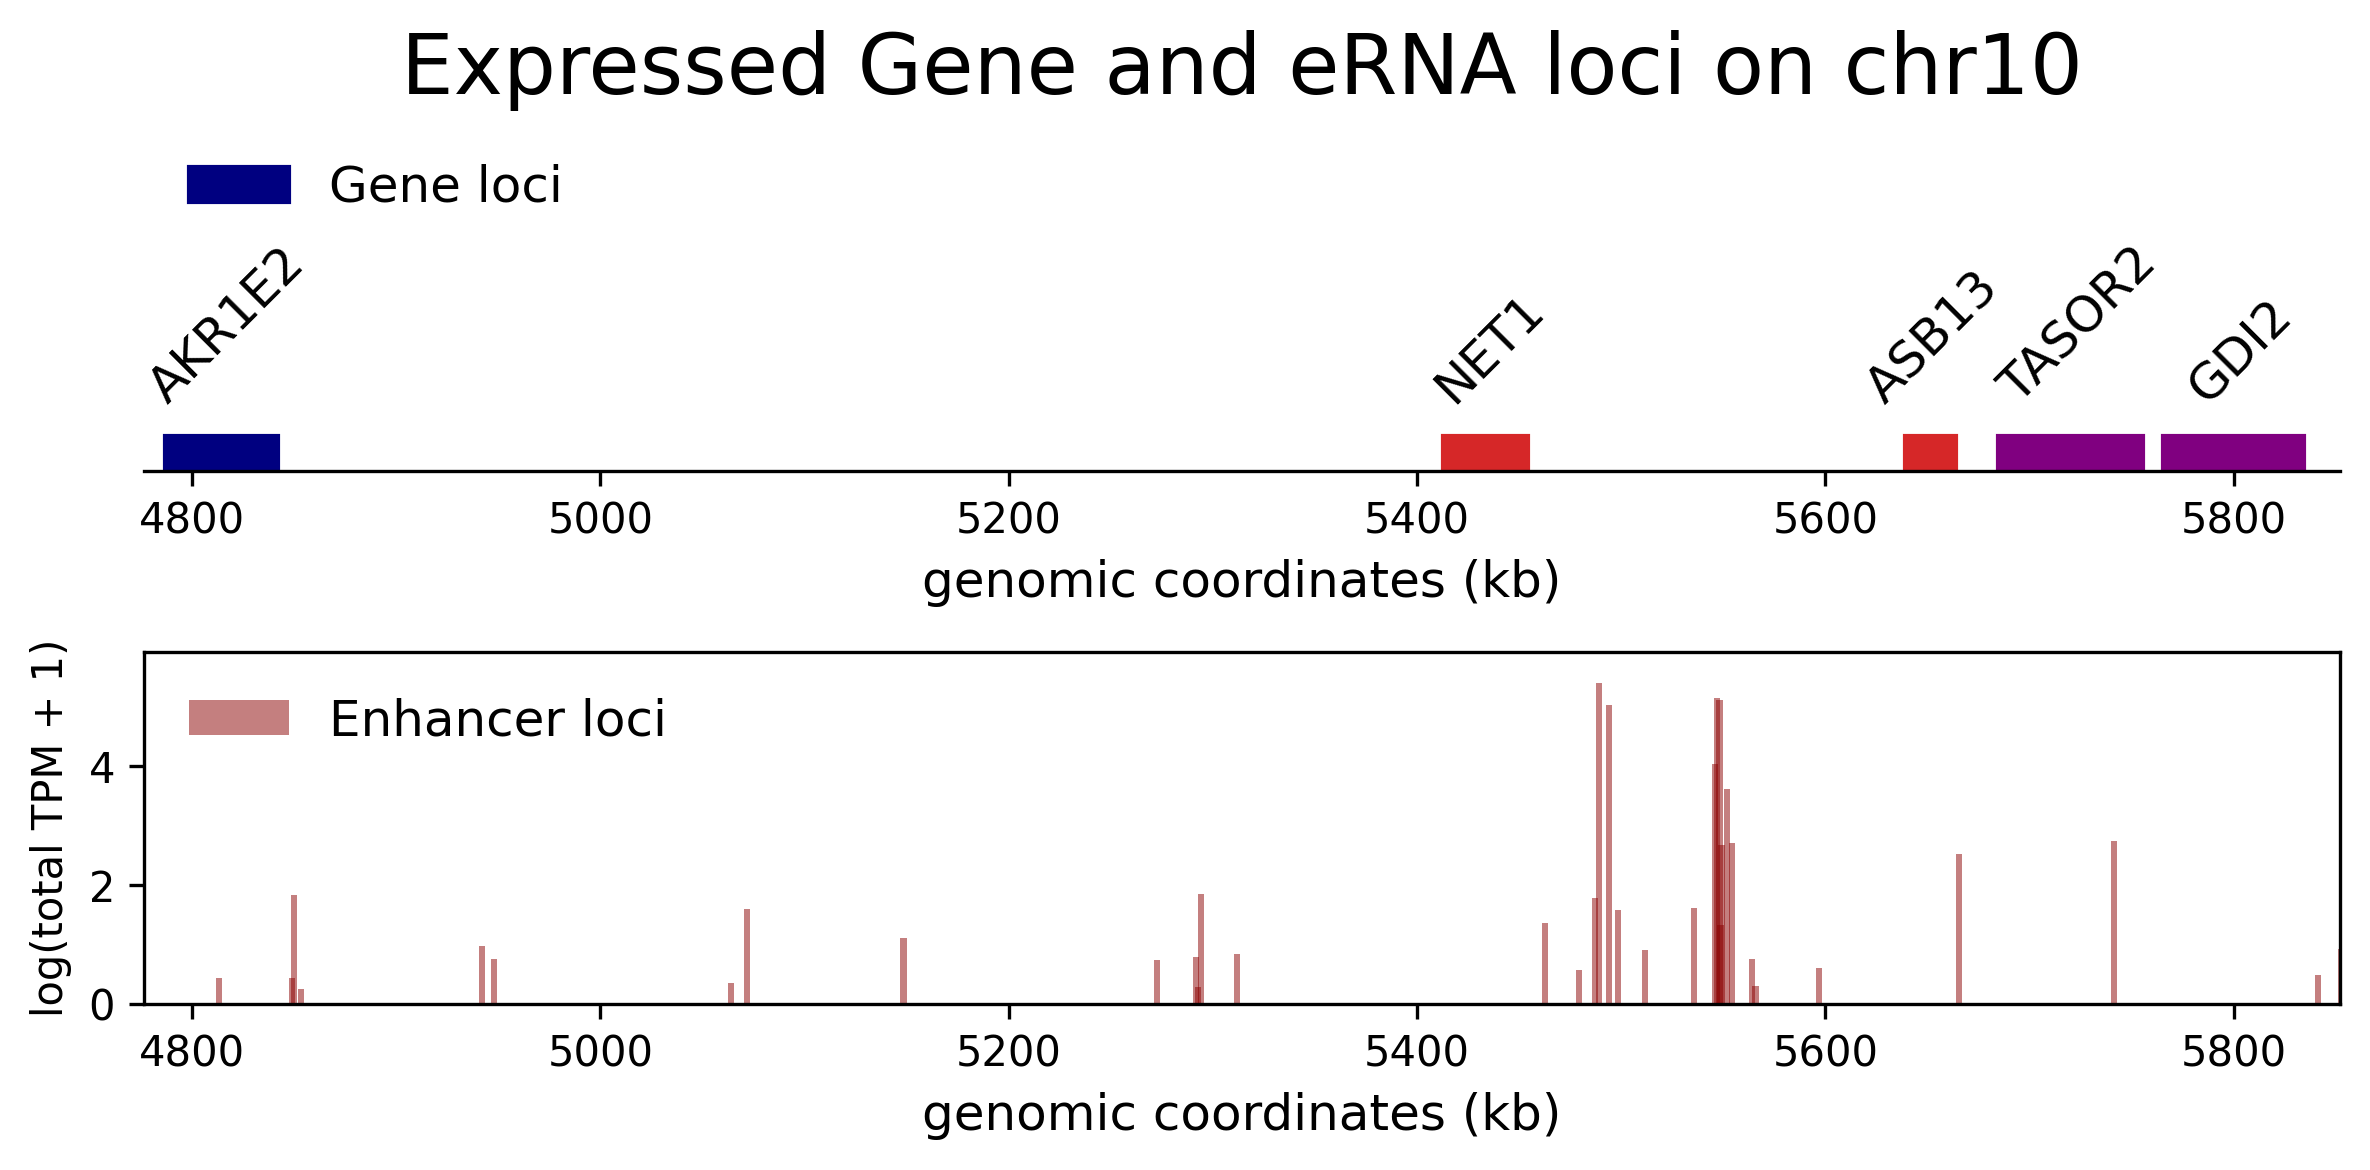

In [45]:
chromosome = "chr10"
start_pos = 4700
end_pos = 5800

ut.plot_expressed_genes_enhancer_loci(gtf_protein_df[gtf_protein_df["gene_name"].isin(proteins_list_E2)], filtered_enhancer_df, chromosome, start_pos, end_pos+50, margin=10, figsize=(8, 4), \
                                      cmap_list=["navy", "tab:red", "tab:red", "purple", "purple"]
                                      )

In [ ]:
print(chromosome, start_pos, end_pos)
cis_k1_df_E2, cis_k1_dict_E2 = ut.gene2loci_df(gtf_protein_df, k1_mean_df_E2, chromosome)
cis_k1_df_TAM, cis_k1_dict_TAM = ut.gene2loci_df(gtf_protein_df, k1_mean_df_TAM, chromosome)

cis_Sp_df_E2, cis_Sp_dict_E2 = ut.gene2loci_df(gtf_protein_df, Sp_mean_df_E2, chromosome)
cis_Sp_df_TAM, cis_Sp_dict_TAM = ut.gene2loci_df(gtf_protein_df, Sp_mean_df_TAM, chromosome)

plots_dir_path_E2 = ut.lag_shifted_plot_corr_heatmap(cis_k1_df_E2, chromosome, start_posi_kb=start_pos, end_posi_kb=end_pos, max_lag=300,step=5, prefix="E2")
plots_dir_path_TAM = ut.lag_shifted_plot_corr_heatmap(cis_k1_df_TAM, chromosome, start_posi_kb=start_pos, end_posi_kb=end_pos, max_lag=300,step=5, prefix="TAM")
plots_dir_path_E2, plots_dir_path_TAM

In [ ]:
ut.make_animation(plots_dir_path_E2, ms_per_frame=75, prefix="E2")
ut.make_animation(plots_dir_path_TAM, ms_per_frame=75, prefix="TAM")